In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4600,1741-WTPON,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,115.85,6567.9,No
6477,3518-FSTWG,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.55,7920.7,No
5680,6982-UQZLY,Female,1,Yes,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.85,20.85,Yes
3688,5312-UXESG,Female,0,No,No,41,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.05,3990.6,No
3013,2065-MMKGR,Female,0,No,No,29,Yes,Yes,DSL,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),71.00,2080.1,No


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce')


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
# To check the how many values are null to decide if we drop them or modify them
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# store the values that does not have ' ' in another data frame
df1 = df[df.TotalCharges != ' ']

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/r_/qgb01fl924sb6q7rw1vvs2w40000gn/T/ipykernel_24238/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


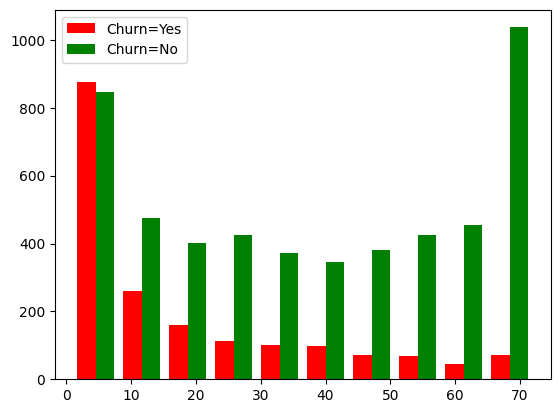

In [9]:
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure
tenure_churn_no = df1[df1.Churn == "No"].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color=["red","green"],label=["Churn=Yes","Churn=No"])
plt.legend()

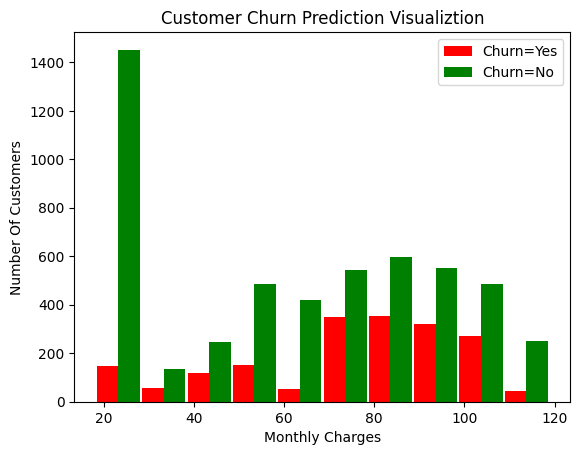

In [10]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [12]:
# Replace no phone service with No and change the df1
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/var/folders/r_/qgb01fl924sb6q7rw1vvs2w40000gn/T/ipykernel_24238/517010967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
/var/folders/r_/qgb01fl924sb6q7rw1vvs2w40000gn/T/ipykernel_24238/517010967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [13]:
# Replace the binary values into 0 and 1:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

df1['gender'].replace({'Female':1,'Male':0},inplace=True)


/var/folders/r_/qgb01fl924sb6q7rw1vvs2w40000gn/T/ipykernel_24238/3400867868.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
/var/folders/r_/qgb01fl924sb6q7rw1vvs2w40000gn/T/ipykernel_24238/3400867868.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [31]:
# Apply concept ONE HOT ENCODIING for columns that has more than 2 values
# Basically: transfor that column into x columns using pandas

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df2.iloc[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,0,0,0,1,22,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,10,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
8,1,0,1,0,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
9,0,0,0,1,62,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [15]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [16]:
# Test split train
x = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape, x_test.shape,x.shape


((5625, 26), (1407, 26), (7032, 26))

In [17]:
len(x_train.columns)

26

In [18]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential ([
        keras.layers.Dense(20,input_shape =(26,),activation = 'relu') , #first hidden layer with 20 nodes, in it has the input layer with 26 nodes
        keras.layers.Dense(1,activation = 'sigmoid') #the output layer , using sigmoid cause its binary classification 1 or 0 
])  

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


/Users/youneschiad/.pyenv/versions/3.12.3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.6003 - loss: 0.6467
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.7966 - loss: 0.4439
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.7913 - loss: 0.4362
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8023 - loss: 0.4152
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.7927 - loss: 0.4284
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.7992 - loss: 0.4161
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8159 - loss: 0.3989
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8078 - loss: 0.4150
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8048 - loss: 0.4183
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8113 - loss: 0.4069
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8038 - loss: 0.4088
Epoch 12/100
176/176 ━━━━━━━━━━

In [19]:
model.evaluate(x_test,y_test)
# evaluation of the model using testing data

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7980 - loss: 0.4427


[0.4480609595775604, 0.7889125943183899]

In [20]:
y_predicted = model.predict(x_test)
y_predicted

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


array([[0.35603076],
       [0.45547768],
       [0.00641758],
       ...,
       [0.7285204 ],
       [0.6634616 ],
       [0.70056754]], dtype=float32)

In [21]:
# convert the predicted values into 1 and 0
y_pred = []

for i in y_predicted:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(y_pred)

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
y_train[0:10]

5664    1
101     0
2621    0
392     0
1327    1
3607    0
2773    0
1936    0
5387    0
4331    0
Name: Churn, dtype: int64

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

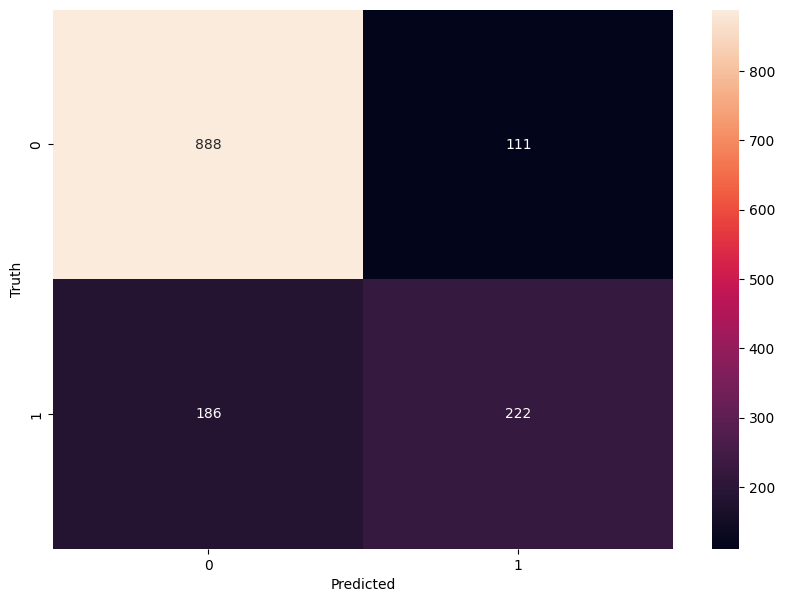

In [24]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# values that are in the diagonal are the true ones
# predictions for zeros: 877 were true  and 183 were false 
# predictions for ones : 225 were true  and 122 were fasle 

In [25]:
len(x_test)

1407

In [26]:
# Calculate the ACCURACY
round((877+225) / (1407) , 2)

0.78

In [27]:
#Precision for 0 class. i.e. Precision for customers who did not churn

round(862/(862+179),2)

0.83

In [28]:
#Precision for 1 class. i.e. Precision for customers who actually churned
round(229/(229+137),2)


0.63

In [29]:
#Recall for 0 class
round(862/(862+137),2)

0.86

In [30]:
# Recall for 1 class
round(229/(229+179),2)


0.56

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 